> ## [Problem 1] Data acquisition

In [170]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (6, 4)
#matplotlib.rcParams['figure.facecolor'] = '#00000000'

# load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
#X["species"] = iris.target_names[iris.target]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [197]:
y = pd.DataFrame(data= np.c_[iris['target']])#columns=iris['Species'])
y.head()

,0
0,0
1,0
2,0
3,0
4,0


> ## [Problem 2] Combining data

In [172]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


> ## [Problem 3] Checking the data

In [173]:
df.head(4)
#its numeric data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0


In [174]:
df.info()
#its numeric data(float dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [175]:
#checking missing value.
df.isnull().sum(axis=0)

#No missing value from output of iris data

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [176]:
#Checking mean, standard deviation, and quartiles of the feature values
df.describe(include='all')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [177]:
df.shape
#there are 150 rows and 5 columns including the index column

(150, 5)

> ## [Problem 4] Examining the iris dataset itself

In [178]:
# Here we can see there are equal distribution of each Iris species
df['Species'].value_counts()


0.0    50
2.0    50
1.0    50
Name: Species, dtype: int64

In [179]:
df.duplicated().sum() #Total of duplicated row is 1

1

In [180]:
# Showing the actual duplicated row
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
142,5.8,2.7,5.1,1.9,2.0


'\n0 = iris_setosa\n1= iris_versicolor\n2= iris_virginica\n'

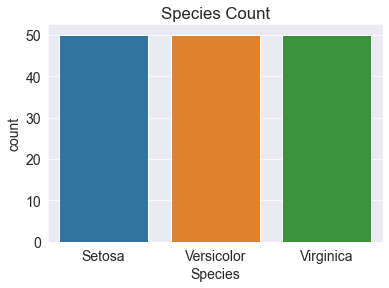

In [181]:
#df  =  pd . DataFrame ( Iris . Data ,  Columns = Iris . Feature_names ) 
df[ 'Species' ] # =  df. Target 
df.loc[ df [ 'Species' ]  ==  0 ,  'Species' ]  =  "Setosa" 
df.loc[ df [ 'Species' ]  ==  1 ,  'Species' ]  = "Versicolor" 
df.loc[ df [ 'Species' ]  ==  2 ,  'Species' ]  =  "Virginica"

plt.title('Species Count')
sns.countplot(df['Species']);

"""
0 = iris_setosa
1= iris_versicolor
2= iris_virginica
"""
#Our dataset is balanced

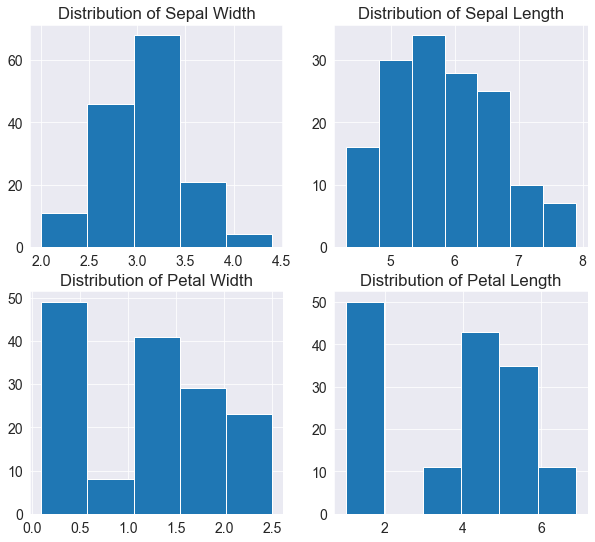

In [182]:
#Looking at the distribution of data
fig, axes = plt.subplots(2, 2, figsize=(10,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['sepal width (cm)'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['sepal length (cm)'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['petal width (cm)'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['petal length (cm)'], bins=6);

> ## [Problem 5] Extracting the required data

 #### The difference between pandas loc and iloc
- loc is label-based, which means that we have to specify the name of the rows and columns that we need to filter out.
- iloc is integer index-based. So here, we have to specify rows and columns by their integer index.

In [183]:
#Extractsepal_width, columns in three different ways
a=df['sepal width (cm)']
a.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

In [184]:
#Extract the 50th to 99th data
b=df.loc[50:99]
b

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
56,6.3,3.3,4.7,1.6,Versicolor
57,4.9,2.4,3.3,1.0,Versicolor
58,6.6,2.9,4.6,1.3,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor


In [185]:
#Extract the50th to 99th data of the petal_lengthcolumn
df.iloc[50:100, [2]]


,petal length (cm)
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [186]:
#Extract data with a petal_width value of 0.2

#d=df.loc[df['petal width (cm)']=0.2]
#df.sort_values(by='petal width (cm)', value=0.2)

#df.loc[iris_data['petal width (cm)'] == '0.2', 'class'

df.loc[ df [ 'petal width (cm)']  ==  0.2 ,  'petal width (cm)' ] 



0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
7     0.2
8     0.2
10    0.2
11    0.2
14    0.2
20    0.2
22    0.2
24    0.2
25    0.2
27    0.2
28    0.2
29    0.2
30    0.2
33    0.2
34    0.2
35    0.2
36    0.2
38    0.2
39    0.2
42    0.2
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal width (cm), dtype: float64

> ## [Problem 6] Creating a diagram

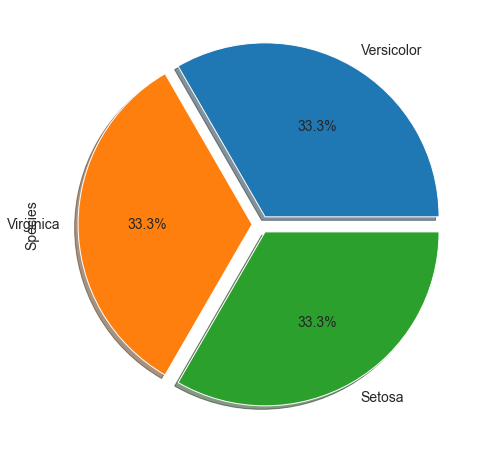

In [219]:
#Make a pie chart of the number of samples per label (while showing percentages)
fig, axes = plt.subplotsfigsize=(12,9)
df['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True,figsize=(8,8))
#plt.title("Pie chart of Species")
plt.show()

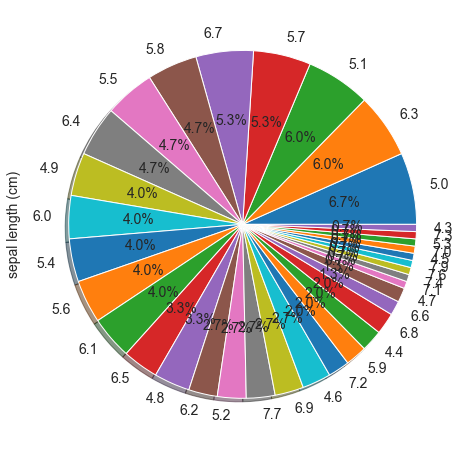

In [216]:
df['sepal length (cm)'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(8,8))
plt.show()

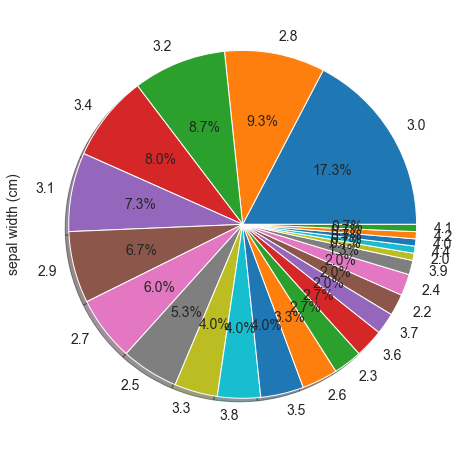

In [222]:
df['sepal width (cm)'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(8,8))
plt.show()

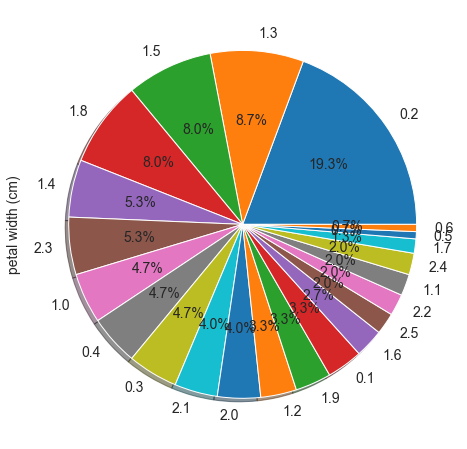

In [220]:
df['petal width (cm)'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(8,8))
plt.show()

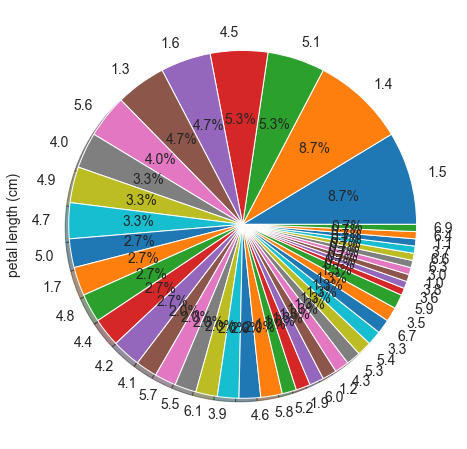

In [221]:
df['petal length (cm)'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(8,8))
plt.show()

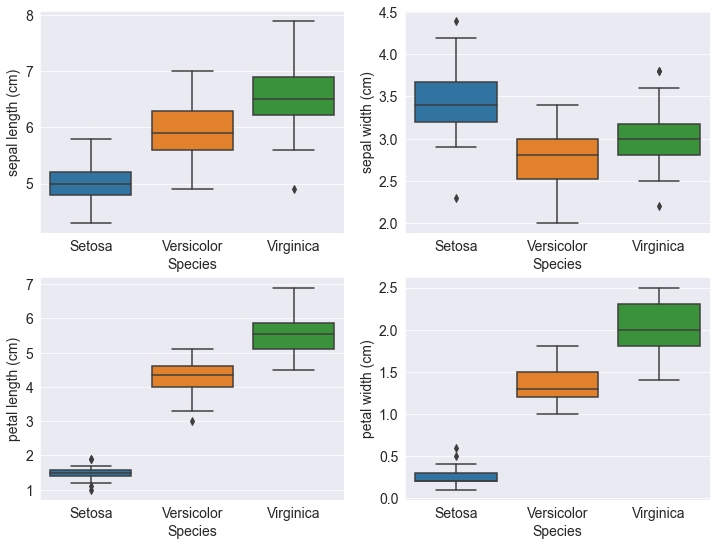

In [206]:
#Select features one by one and visualize the distribution of data for each label using a box plot
fig, axes = plt.subplots(2, 2, figsize=(12,9))
sns.boxplot(  y="sepal length (cm)", x= "Species", data=df,  orient='v', ax=axes[0, 0])
sns.boxplot(  y="sepal width (cm)", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="petal length (cm)", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="petal width (cm)", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

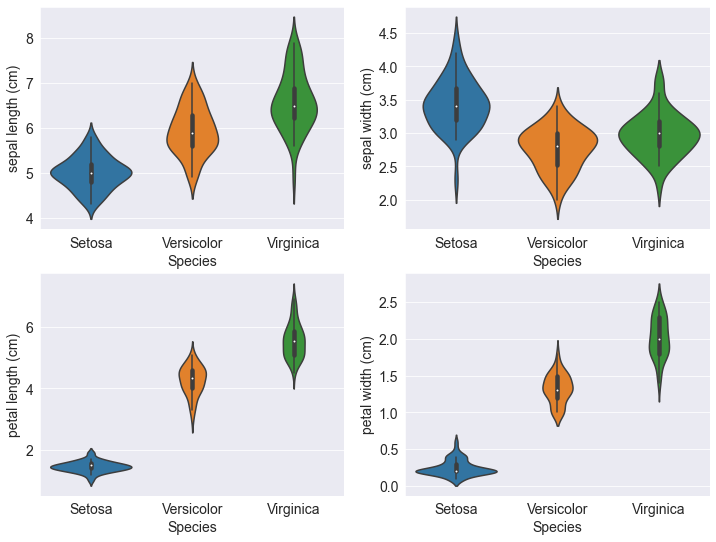

In [207]:
#Select features one by one and visualize the distribution of data for each label using a violin plot
fig, axes = plt.subplots(2, 2, figsize=(12,9))
sns.violinplot(  y="sepal length (cm)", x= "Species", data=df,  orient='v', ax=axes[0, 0])
sns.violinplot(  y="sepal width (cm)", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
sns.violinplot(  y="petal length (cm)", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
sns.violinplot(  y="petal width (cm)", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

> ##  [Problem 7] Confirming the relationship between features

'\nsetosa species has a large difference in its characteristics when compared to the other species, \nit has smaller petal width and length while its sepal width is high and its sepal length is low. \nAlso, the other species like the Versicolor species usually have average dimensions whether it is sepal or pedal. \nWhile virginica has high pedal width and length while it has small sepal width but large sepal length.\n'

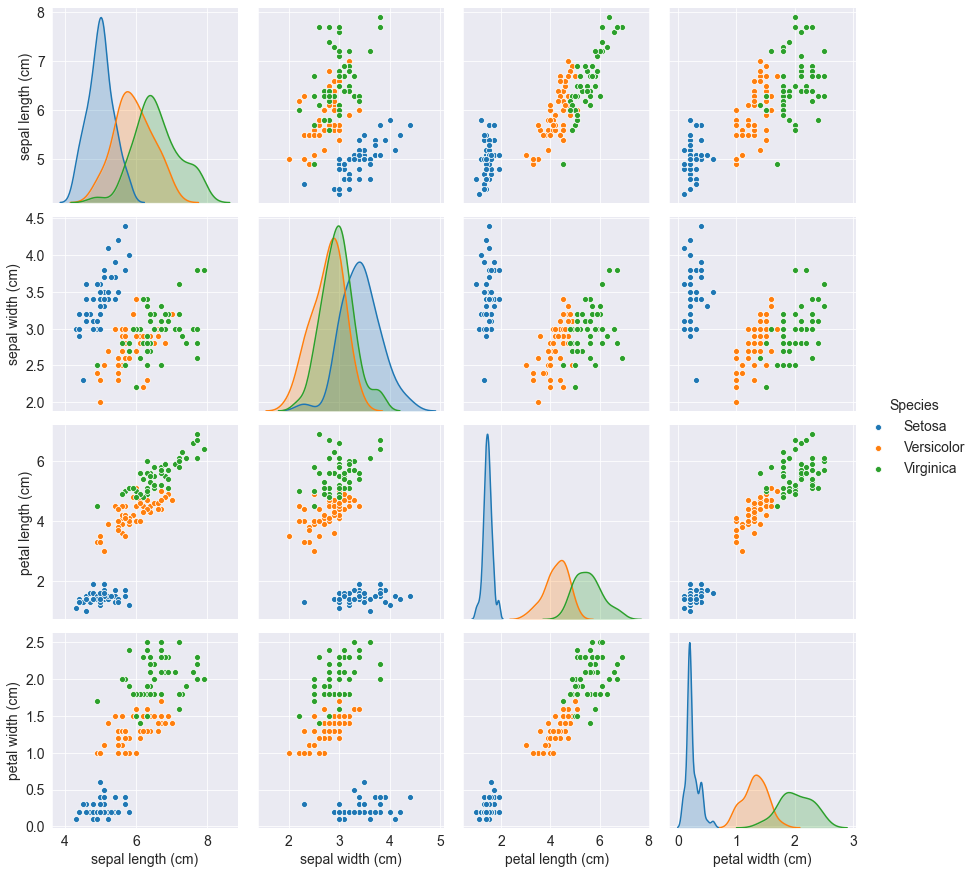

In [190]:
#Pair plot for relationship between columns
sns.pairplot(df,hue="Species",height=3);

#Interpretation below
"""
setosa species has a large difference in its characteristics when compared to the other species, 
it has smaller petal width and length while its sepal width is high and its sepal length is low. 
Also, the other species like the Versicolor species usually have average dimensions whether it is sepal or pedal. 
While virginica has high pedal width and length while it has small sepal width but large sepal length.
"""


In [191]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


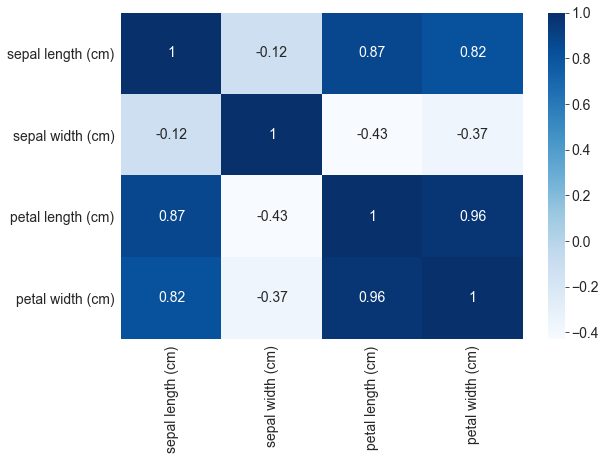

In [192]:
fig = plt.figure(figsize = (9,6))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

> ## [Problem 8] Explaining the results of visualized graphs and tables

>####  Looking at the distribution of data: 
- The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
- The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
- The Highest frequency of petal width is between 0 to 0.5 which is around 50.
- The Highest frequency of petal length is between 0 to 0.5 which is around 50.

> #### From the heatmap: 
- we see that petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.
